(pd)=
```{raw} jupyter
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# {index}`Pandas <single: Pandas>`

```{index} single: Python; Pandas
```

In addition to what’s in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install --upgrade wbgapi
!pip install --upgrade yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.0 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 113.1 MB/s eta 0:00:00


  Installing build dependencies ... -

 \

 |

 /

 done


  Getting requirements to build wheel ... -

 done


  Preparing metadata (pyproject.toml) ... -

 done


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/8.5 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 146.6 MB/s eta 0:00:00


 \

 |

 done
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-linux_x86_64.whl size=303841 sha256=92758a36619e8f7e36d61530b9fa7945231dc98de86a544b66fdcc2d8163b065
  Stored in directory: /home/runner/.cache/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee


## Overview

[Pandas](http://pandas.pydata.org/) is a package of fast, efficient data analysis tools for Python.

Its popularity has surged in recent years, coincident with the rise
of fields such as data science and machine learning.

Here's a popularity comparison over time against Matlab and STATA courtesy of Stack Overflow Trends

```{figure} /_static/lecture_specific/pandas/pandas_vs_rest.png
:scale: 100
```

Just as [NumPy](http://www.numpy.org/) provides the basic array data type plus core array operations, pandas

1. defines fundamental structures for working with data and
1. endows them with methods that facilitate operations such as
    * reading in data
    * adjusting indices
    * working with dates and time series
    * sorting, grouping, re-ordering and general data munging [^mung]
    * dealing with missing values, etc., etc.

More sophisticated statistical functionality is left to other packages, such
as [statsmodels](http://www.statsmodels.org/) and [scikit-learn](http://scikit-learn.org/), which are built on top of pandas.

This lecture will provide a basic introduction to pandas.

Throughout the lecture, we will assume that the following imports have taken
place

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

Two important data types defined by pandas are  `Series` and `DataFrame`.

You can think of a `Series` as a "column" of data, such as a collection of observations on a single variable.

A `DataFrame` is a two-dimensional object for storing related columns of data.

## Series

```{index} single: Pandas; Series
```

Let's start with Series.


We begin by creating a series of four random observations

In [3]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0   -0.944454
1   -0.442306
2   -1.084913
3   -2.290765
Name: daily returns, dtype: float64

Here you can imagine the indices `0, 1, 2, 3` as indexing four listed
companies, and the values being daily returns on their shares.

Pandas `Series` are built on top of NumPy arrays and support many similar
operations

In [4]:
s * 100

0    -94.445427
1    -44.230562
2   -108.491322
3   -229.076527
Name: daily returns, dtype: float64

In [5]:
np.abs(s)

0    0.944454
1    0.442306
2    1.084913
3    2.290765
Name: daily returns, dtype: float64

But `Series` provide more than NumPy arrays.

Not only do they have some additional (statistically oriented) methods

In [6]:
s.describe()

count    4.000000
mean    -1.190610
std      0.783595
min     -2.290765
25%     -1.386376
50%     -1.014684
75%     -0.818917
max     -0.442306
Name: daily returns, dtype: float64

But their indices are more flexible

In [7]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN   -0.944454
AAPL   -0.442306
MSFT   -1.084913
GOOG   -2.290765
Name: daily returns, dtype: float64

Viewed in this way, `Series` are like fast, efficient Python dictionaries
(with the restriction that the items in the dictionary all have the same
type---in this case, floats).

In fact, you can use much of the same syntax as Python dictionaries

In [8]:
s['AMZN']

-0.944454274919541

In [9]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL   -0.442306
MSFT   -1.084913
GOOG   -2.290765
Name: daily returns, dtype: float64

In [10]:
'AAPL' in s

True

## DataFrames

```{index} single: Pandas; DataFrames
```

While a `Series` is a single column of data, a `DataFrame` is several columns, one for each variable.

In essence, a `DataFrame` in pandas is analogous to a (highly optimized) Excel spreadsheet.

Thus, it is a powerful tool for representing and analyzing data that are naturally organized into rows and columns, often with descriptive indexes for individual rows and individual columns.

Let's look at an example that reads data from the CSV file `pandas/data/test_pwt.csv`, which is taken from the [Penn World Tables](https://www.rug.nl/ggdc/productivity/pwt/pwt-releases/pwt-7.0).

The dataset contains the following indicators 

| Variable Name | Description |
| :-: | :-: |
| POP | Population (in thousands) |
| XRAT | Exchange Rate to US Dollar |                     
| tcgdp | Total PPP Converted GDP (in million international dollar) |
| cc | Consumption Share of PPP Converted GDP Per Capita (%) |
| cg | Government Consumption Share of PPP Converted GDP Per Capita (%) |


We'll read this in from a URL using the `pandas` function `read_csv`.

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

Here's the content of `test_pwt.csv`

In [12]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


### Select Data by Position

In practice, one thing that we do all the time is to find, select and work with a subset of the data of our interests. 

We can select particular rows using standard Python array slicing notation

In [13]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


To select columns, we can pass a list containing the names of the desired columns represented as strings

In [14]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


To select both rows and columns using integers, the `iloc` attribute should be used with the format `.iloc[rows, columns]`.

In [15]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


To select rows and columns using a mixture of integers and labels, the `loc` attribute can be used in a similar way

In [16]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


### Select Data by Conditions

Instead of indexing rows and columns using integers and names, we can also obtain a sub-dataframe of our interests that satisfies certain (potentially complicated) conditions.

This section demonstrates various ways to do that.

The most straightforward way is with the `[]` operator.

In [17]:
df[df.POP >= 20000]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.00000,9.898700e+06,72.347054,6.032454


To understand what is going on here, notice that `df.POP >= 20000` returns a series of boolean values.

In [18]:
df.POP >= 20000

0     True
1    False
2     True
3    False
4    False
5     True
6     True
7    False
Name: POP, dtype: bool

In this case, `df[___]` takes a series of boolean values and only returns rows with the `True` values.

Take one more example,

In [19]:
df[(df.country.isin(['Argentina', 'India', 'South Africa'])) & (df.POP > 40000)]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546


However, there is another way of doing the same thing, which can be slightly faster for large dataframes, with more natural syntax.

In [20]:
# the above is equivalent to 
df.query("POP >= 20000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.00000,9.898700e+06,72.347054,6.032454


In [21]:
df.query("country in ['Argentina', 'India', 'South Africa'] and POP > 40000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546


We can also allow arithmetic operations between different columns.

In [22]:
df[(df.cc + df.cg >= 80) & (df.POP <= 20000)]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
4,Malawi,MWI,2000,11801.505,59.543808,5026.221784,74.707624,11.658954
7,Uruguay,URY,2000,3219.793,12.099592,25255.961693,78.978740,5.108068


In [23]:
# the above is equivalent to 
df.query("cc + cg >= 80 & POP <= 20000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
4,Malawi,MWI,2000,11801.505,59.543808,5026.221784,74.707624,11.658954
7,Uruguay,URY,2000,3219.793,12.099592,25255.961693,78.978740,5.108068


For example, we can use the conditioning to select the country with the largest household consumption - gdp share `cc`.

In [24]:
df.loc[df.cc == max(df.cc)]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
7,Uruguay,URY,2000,3219.793,12.099592,25255.961693,78.97874,5.108068


When we only want to look at certain columns of a selected sub-dataframe, we can use the above conditions with the `.loc[__ , __]` command.

The first argument takes the condition, while the second argument takes a list of columns we want to return.

In [25]:
df.loc[(df.cc + df.cg >= 80) & (df.POP <= 20000), ['country', 'year', 'POP']]

,country,year,POP
4,Malawi,2000,11801.505
7,Uruguay,2000,3219.793


**Application: Subsetting Dataframe**

Real-world datasets can be [enormous](https://developers.google.com/machine-learning/data-prep/construct/collect/data-size-quality).

It is sometimes desirable to work with a subset of data to enhance computational efficiency and reduce redundancy.

Let's imagine that we're only interested in the population (`POP`) and total GDP (`tcgdp`).

One way to strip the data frame `df` down to only these variables is to overwrite the dataframe using the selection method described above

In [26]:
df_subset = df[['country', 'POP', 'tcgdp']]
df_subset

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


We can then save the smaller dataset for further analysis.

```{code-block} python3
:class: no-execute

df_subset.to_csv('pwt_subset.csv', index=False)
```

### Apply Method

Another widely used Pandas method is `df.apply()`. 

It applies a function to each row/column and returns a series. 

This function can be some built-in functions like the `max` function, a `lambda` function, or a user-defined function.

Here is an example using the `max` function

In [27]:
df[['year', 'POP', 'XRAT', 'tcgdp', 'cc', 'cg']].apply(max)

year     2.000000e+03
POP      1.006300e+06
XRAT     5.954381e+01
tcgdp    9.898700e+06
cc       7.897874e+01
cg       1.407221e+01
dtype: float64

This line of code applies the `max` function to all selected columns.

`lambda` function is often used with `df.apply()` method 

A trivial example is to return itself for each row in the dataframe

In [28]:
df.apply(lambda row: row, axis=1)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


```{note}
For the `.apply()` method
- axis = 0 -- apply function to each column (variables)
- axis = 1 -- apply function to each row (observations)
- axis = 0 is the default parameter
```

We can use it together with `.loc[]` to do some more advanced selection.

In [29]:
complexCondition = df.apply(
    lambda row: row.POP > 40000 if row.country in ['Argentina', 'India', 'South Africa'] else row.POP < 20000, 
    axis=1), ['country', 'year', 'POP', 'XRAT', 'tcgdp']

`df.apply()` here returns a series of boolean values rows that satisfies the condition specified in the if-else statement.

In addition, it also defines a subset of variables of interest.

In [30]:
complexCondition

(0    False
 1     True
 2     True
 3     True
 4     True
 5     True
 6    False
 7     True
 dtype: bool,
 ['country', 'year', 'POP', 'XRAT', 'tcgdp'])

When we apply this condition to the dataframe, the result will be

In [31]:
df.loc[complexCondition]

,country,year,POP,XRAT,tcgdp
1,Australia,2000,19053.186,1.724830,5.418047e+05
2,India,2000,1006300.297,44.941600,1.728144e+06
3,Israel,2000,6114.570,4.077330,1.292539e+05
4,Malawi,2000,11801.505,59.543808,5.026222e+03
5,South Africa,2000,45064.098,6.939830,2.272424e+05
7,Uruguay,2000,3219.793,12.099592,2.525596e+04


### Make Changes in DataFrames

The ability to make changes in dataframes is important to generate a clean dataset for future analysis.


**1.** We can use `df.where()` conveniently to "keep" the rows we have selected and replace the rest rows with any other values

In [32]:
df.where(df.POP >= 20000, False)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.9995,295072.21869,75.716805,5.578804
1,False,False,False,False,False,False,False,False
2,India,IND,2000,1006300.297,44.9416,1728144.3748,64.575551,14.072206
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,South Africa,ZAF,2000,45064.098,6.93983,227242.36949,72.71871,5.726546
6,United States,USA,2000,282171.957,1.0,9898700.0,72.347054,6.032454
7,False,False,False,False,False,False,False,False


**2.** We can simply use `.loc[]` to specify the column that we want to modify, and assign values

In [33]:
df.loc[df.cg == max(df.cg), 'cg'] = np.nan
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,NaN
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


**3.** We can use the `.apply()` method to modify *rows/columns as a whole*

In [34]:
def update_row(row):
    # modify POP
    row.POP = np.nan if row.POP<= 10000 else row.POP

    # modify XRAT
    row.XRAT = row.XRAT / 10
    return row

df.apply(update_row, axis=1)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.099950,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,0.172483,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,4.494160,1.728144e+06,64.575551,NaN
3,Israel,ISR,2000,NaN,0.407733,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,5.954381,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,0.693983,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,0.100000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,NaN,1.209959,2.525596e+04,78.978740,5.108068


**4.** We can use the `.map()` method to modify all *individual entries* in the dataframe altogether.

In [35]:
# Round all decimal numbers to 2 decimal places
df.map(lambda x : round(x,2) if type(x)!=str else x)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.65,1.00,295072.22,75.72,5.58
1,Australia,AUS,2000,19053.19,1.72,541804.65,67.76,6.72
2,India,IND,2000,1006300.30,44.94,1728144.37,64.58,NaN
3,Israel,ISR,2000,6114.57,4.08,129253.89,64.44,10.27
4,Malawi,MWI,2000,11801.50,59.54,5026.22,74.71,11.66
5,South Africa,ZAF,2000,45064.10,6.94,227242.37,72.72,5.73
6,United States,USA,2000,282171.96,1.00,9898700.00,72.35,6.03
7,Uruguay,URY,2000,3219.79,12.10,25255.96,78.98,5.11


**Application: Missing Value Imputation**

Replacing missing values is an important step in data munging. 

Let's randomly insert some NaN values

In [36]:
for idx in list(zip([0, 3, 5, 6], [3, 4, 6, 2])):
    df.iloc[idx] = np.nan

df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,NaN,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000.0,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000.0,1006300.297,44.941600,1.728144e+06,64.575551,NaN
3,Israel,ISR,2000.0,6114.570,NaN,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000.0,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000.0,45064.098,6.939830,2.272424e+05,NaN,5.726546
6,United States,USA,NaN,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000.0,3219.793,12.099592,2.525596e+04,78.978740,5.108068


The `zip()` function here creates pairs of values from the two lists (i.e. [0,3], [3,4] ...)

We can use the `.map()` method again to replace all missing values with 0

In [37]:
# replace all NaN values by 0
def replace_nan(x):
    if type(x)!=str:
        return  0 if np.isnan(x) else x
    else:
        return x

df.map(replace_nan)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,0.000,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000.0,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000.0,1006300.297,44.941600,1.728144e+06,64.575551,0.000000
3,Israel,ISR,2000.0,6114.570,0.000000,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000.0,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000.0,45064.098,6.939830,2.272424e+05,0.000000,5.726546
6,United States,USA,0.0,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000.0,3219.793,12.099592,2.525596e+04,78.978740,5.108068


Pandas also provides us with convenient methods to replace missing values.

For example, single imputation using variable means can be easily done in pandas

In [38]:
df = df.fillna(df.iloc[:,2:8].mean())
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,1.962465e+05,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000.0,1.905319e+04,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000.0,1.006300e+06,44.941600,1.728144e+06,64.575551,7.298802
3,Israel,ISR,2000.0,6.114570e+03,18.178451,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000.0,1.180150e+04,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000.0,4.506410e+04,6.939830,2.272424e+05,71.217322,5.726546
6,United States,USA,2000.0,2.821720e+05,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000.0,3.219793e+03,12.099592,2.525596e+04,78.978740,5.108068


Missing value imputation is a big area in data science involving various machine learning techniques.

There are also more [advanced tools](https://scikit-learn.org/stable/modules/impute.html) in python to impute missing values.

### Standardization and Visualization

Let's imagine that we're only interested in the population (`POP`) and total GDP (`tcgdp`).

One way to strip the data frame `df` down to only these variables is to overwrite the dataframe using the selection method described above

In [39]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,1.962465e+05,2.950722e+05
1,Australia,1.905319e+04,5.418047e+05
2,India,1.006300e+06,1.728144e+06
3,Israel,6.114570e+03,1.292539e+05
4,Malawi,1.180150e+04,5.026222e+03
5,South Africa,4.506410e+04,2.272424e+05
6,United States,2.821720e+05,9.898700e+06
7,Uruguay,3.219793e+03,2.525596e+04


Here the index `0, 1,..., 7` is redundant because we can use the country names as an index.

To do this, we set the index to be the `country` variable in the dataframe

In [40]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,1.962465e+05,2.950722e+05
Australia,1.905319e+04,5.418047e+05
India,1.006300e+06,1.728144e+06
Israel,6.114570e+03,1.292539e+05
Malawi,1.180150e+04,5.026222e+03
South Africa,4.506410e+04,2.272424e+05
United States,2.821720e+05,9.898700e+06
Uruguay,3.219793e+03,2.525596e+04


Let's give the columns slightly better names

In [41]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,1.962465e+05,2.950722e+05
Australia,1.905319e+04,5.418047e+05
India,1.006300e+06,1.728144e+06
Israel,6.114570e+03,1.292539e+05
Malawi,1.180150e+04,5.026222e+03
South Africa,4.506410e+04,2.272424e+05
United States,2.821720e+05,9.898700e+06
Uruguay,3.219793e+03,2.525596e+04


The `population` variable is in thousands, let's revert to single units

In [42]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,1.962465e+08,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


Next, we're going to add a column showing real GDP per capita, multiplying by 1,000,000 as we go because total GDP is in millions

In [43]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,1.962465e+08,2.950722e+05,1503.579625
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


One of the nice things about pandas `DataFrame` and `Series` objects is that they have methods for plotting and visualization that work through Matplotlib.

For example, we can easily generate a bar plot of GDP per capita

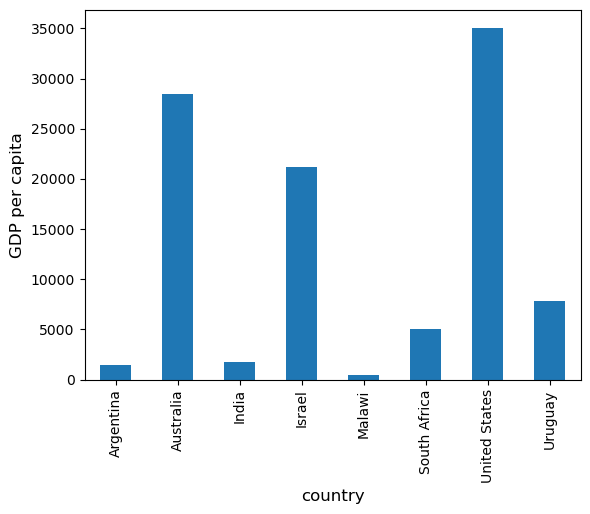

In [44]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

At the moment the data frame is ordered alphabetically on the countries---let's change it to GDP per capita

In [45]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Argentina,1.962465e+08,2.950722e+05,1503.579625
Malawi,1.180150e+07,5.026222e+03,425.896679


Plotting as before now yields

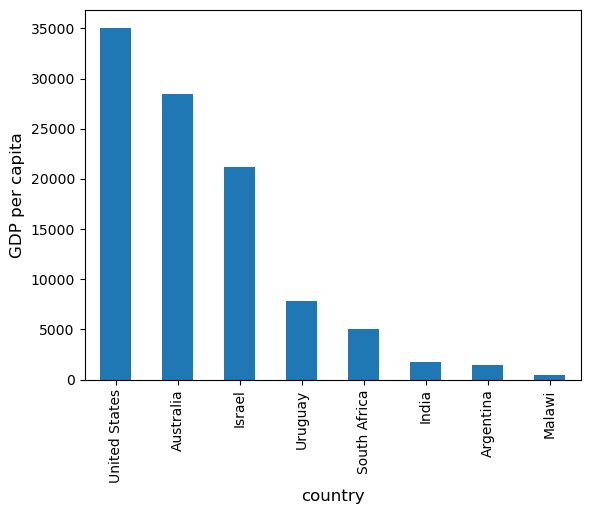

In [46]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

## On-Line Data Sources

```{index} single: Data Sources
```

Python makes it straightforward to query online databases programmatically.

An important database for economists is [FRED](https://research.stlouisfed.org/fred2/) --- a vast collection of time series data maintained by the St. Louis Fed.

For example, suppose that we are interested in the [unemployment rate](https://research.stlouisfed.org/fred2/series/UNRATE).

(To download the data as a csv, click on the top right `Download` and select the `CSV (data)` option).

Alternatively, we can access the CSV file from within a Python program.

This can be done with a variety of methods.

We start with a relatively low-level method and then return to pandas.

### Accessing Data with {index}`requests <single: requests>`

```{index} single: Python; requests
```

One option is to use [requests](https://requests.readthedocs.io/en/master/), a standard Python library for requesting data over the Internet.

To begin, try the following code on your computer

In [47]:
r = requests.get('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2024-06-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-07-29&revision_date=2024-07-29&nd=1948-01-01')

If there's no error message, then the call has succeeded.

If you do get an error, then there are two likely causes

1. You are not connected to the Internet --- hopefully, this isn't the case.
1. Your machine is accessing the Internet through a proxy server, and Python isn't aware of this.

In the second case, you can either

* switch to another machine
* solve your proxy problem by reading [the documentation](https://requests.readthedocs.io/en/master/)

Assuming that all is working, you can now proceed to use the `source` object returned by the call `requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')`

In [48]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2024-06-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-07-29&revision_date=2024-07-29&nd=1948-01-01'
source = requests.get(url).content.decode().split("\n")
source[0]

'observation_date,UNRATE'

In [49]:
source[1]

'1948-01-01,3.4'

In [50]:
source[2]

'1948-02-01,3.8'

We could now write some additional code to parse this text and store it as an array.

But this is unnecessary --- pandas' `read_csv` function can handle the task for us.

We use `parse_dates=True` so that pandas recognizes our dates column, allowing for simple date filtering

In [51]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

The data has been read into a pandas DataFrame called `data` that we can now manipulate in the usual way

In [52]:
type(data)

pandas.core.frame.DataFrame

In [53]:
data.head()  # A useful method to get a quick look at a data frame

,UNRATE
observation_date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [54]:
pd.set_option('display.precision', 1)
data.describe()  # Your output might differ slightly

,UNRATE
count,918.0
mean,5.7
std,1.7
min,2.5
25%,4.4
50%,5.5
75%,6.7
max,14.8


We can also plot the unemployment rate from 2006 to 2012 as follows

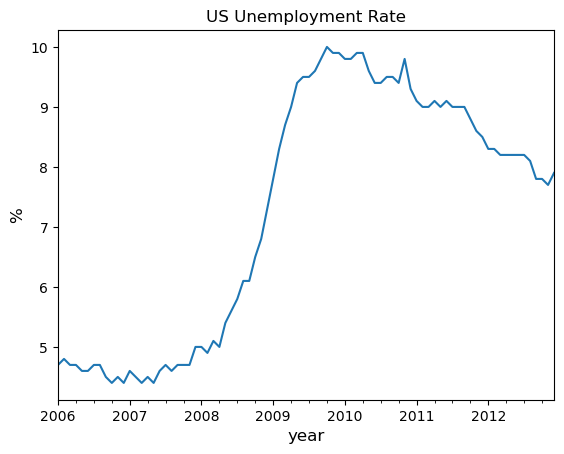

In [55]:
ax = data['2006':'2012'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

Note that pandas offers many other file type alternatives.

Pandas has [a wide variety](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) of top-level methods that we can use to read, excel, json, parquet or plug straight into a database server.

### Using {index}`wbgapi <single: wbgapi>` and {index}`yfinance <single: yfinance>` to Access Data

The [wbgapi](https://pypi.org/project/wbgapi/) python library can be used to fetch data from the many databases published by the World Bank.

```{note}
You can find some useful information about the [wbgapi](https://pypi.org/project/wbgapi/) package in this [world bank blog post](https://blogs.worldbank.org/en/opendata/introducing-wbgapi-new-python-package-accessing-world-bank-data), in addition to this [tutorial](https://github.com/tgherzog/wbgapi/blob/master/examples/wbgapi-quickstart.ipynb)
```

We will also use [yfinance](https://pypi.org/project/yfinance/) to fetch data from Yahoo finance
in the exercises.

For now let's work through one example of downloading and plotting data --- this
time from the World Bank.

The World Bank [collects and organizes data](http://data.worldbank.org/indicator) on a huge range of indicators.

For example, [here's](http://data.worldbank.org/indicator/GC.DOD.TOTL.GD.ZS/countries) some data on government debt as a ratio to GDP.

The next code example fetches the data for you and plots time series for the US and Australia

In [56]:
import wbgapi as wb
wb.series.info('GC.DOD.TOTL.GD.ZS')

id,value
GC.DOD.TOTL.GD.ZS,"Central government debt, total (% of GDP)"
,1 elements


In [57]:
govt_debt = wb.data.DataFrame('GC.DOD.TOTL.GD.ZS', economy=['USA','AUS'], time=range(2005,2016))
govt_debt = govt_debt.T    # move years from columns to rows for plotting

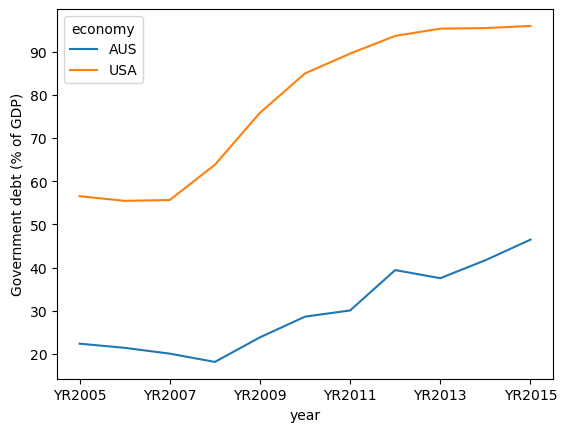

In [58]:
govt_debt.plot(xlabel='year', ylabel='Government debt (% of GDP)');

## Exercises

```{exercise-start}
:label: pd_ex1
```

With these imports:

In [59]:
import datetime as dt
import yfinance as yf

Write a program to calculate the percentage price change over 2021 for the following shares:

In [60]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'C': 'Citigroup',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google'}

Here's the first part of the program

In [61]:
def read_data(ticker_list,
          start=dt.datetime(2021, 1, 1),
          end=dt.datetime(2021, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        stock = yf.Ticker(tick)
        prices = stock.history(start=start, end=end)

        # Change the index to date-only
        prices.index = pd.to_datetime(prices.index.date)
        
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

Complete the program to plot the result as a bar graph like this one:

```{figure} /_static/lecture_specific/pandas/pandas_share_prices.png
:scale: 80
```

```{exercise-end}
```

```{solution-start} pd_ex1
:class: dropdown
```

There are a few ways to approach this problem using Pandas to calculate
the percentage change.

First, you can extract the data and perform the calculation such as:

In [62]:
p1 = ticker.iloc[0]    #Get the first set of prices as a Series
p2 = ticker.iloc[-1]   #Get the last set of prices as a Series
price_change = (p2 - p1) / p1 * 100
price_change

INTC     6.9
MSFT    57.2
IBM     18.7
BHP     -2.2
TM      23.4
AAPL    38.6
AMZN     5.8
C        3.6
QCOM    25.3
KO      14.9
GOOG    69.0
dtype: float64

Alternatively you can use an inbuilt method `pct_change` and configure it to
perform the correct calculation using `periods` argument.

In [63]:
change = ticker.pct_change(periods=len(ticker)-1, axis='rows')*100
price_change = change.iloc[-1]
price_change

INTC     6.9
MSFT    57.2
IBM     18.7
BHP     -2.2
TM      23.4
AAPL    38.6
AMZN     5.8
C        3.6
QCOM    25.3
KO      14.9
GOOG    69.0
Name: 2021-12-30 00:00:00, dtype: float64

Then to plot the chart

In [64]:
price_change.sort_values(inplace=True)
price_change.rename(index=ticker_list, inplace=True)

/tmp/ipykernel_2578/1503263560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_change.sort_values(inplace=True)
/tmp/ipykernel_2578/1503263560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_change.rename(index=ticker_list, inplace=True)


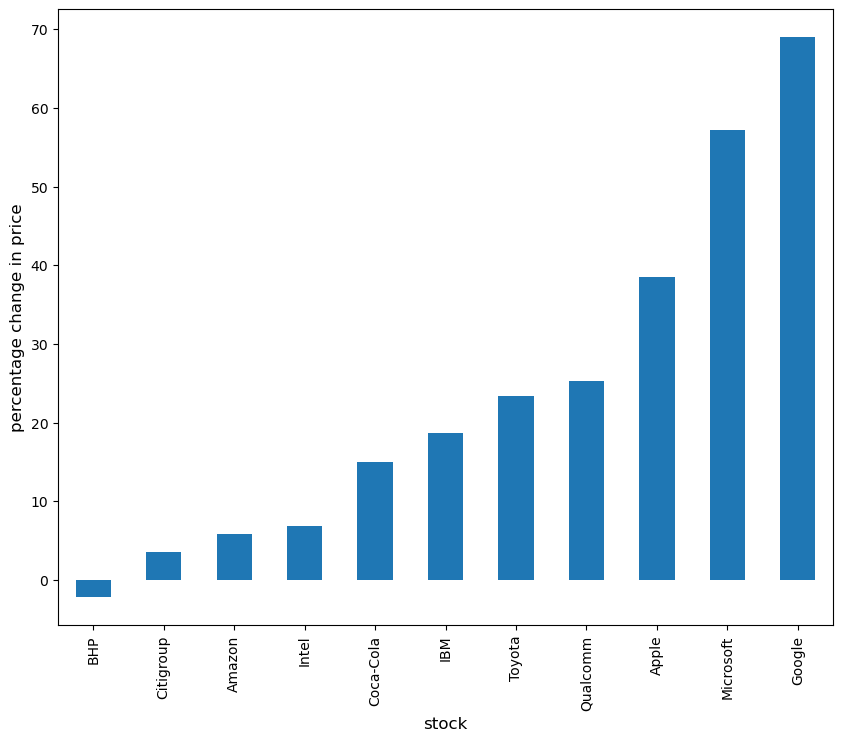

In [65]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('stock', fontsize=12)
ax.set_ylabel('percentage change in price', fontsize=12)
price_change.plot(kind='bar', ax=ax)
plt.show()

```{solution-end}
```


```{exercise-start}
:label: pd_ex2
```

Using the method `read_data` introduced in {ref}`pd_ex1`, write a program to obtain year-on-year percentage change for the following indices:

In [66]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

Complete the program to show summary statistics and plot the result as a time series graph like this one:

```{figure} /_static/lecture_specific/pandas/pandas_indices_pctchange.png
:scale: 80
```

```{exercise-end}
```

```{solution-start} pd_ex2
:class: dropdown
```

Following the work you did in {ref}`pd_ex1`, you can query the data using `read_data` by updating the start and end dates accordingly.

In [67]:
indices_data = read_data(
        indices_list,
        start=dt.datetime(1971, 1, 1),  #Common Start Date
        end=dt.datetime(2021, 12, 31)
)

Then, extract the first and last set of prices per year as DataFrames and calculate the yearly returns such as:

In [68]:
yearly_returns = pd.DataFrame()

for index, name in indices_list.items():
    p1 = indices_data.groupby(indices_data.index.year)[index].first()  # Get the first set of returns as a DataFrame
    p2 = indices_data.groupby(indices_data.index.year)[index].last()   # Get the last set of returns as a DataFrame
    returns = (p2 - p1) / p1
    yearly_returns[name] = returns

yearly_returns

,S&P 500,NASDAQ,Dow Jones,Nikkei
1971,1.2e-01,1.4e-01,NaN,3.6e-01
1972,1.6e-01,1.8e-01,NaN,9.2e-01
1973,-1.8e-01,-3.2e-01,NaN,-1.8e-01
1974,-3.0e-01,-3.5e-01,NaN,-9.9e-02
1975,2.8e-01,2.8e-01,NaN,1.7e-01
1976,1.8e-01,2.5e-01,NaN,1.3e-01
1977,-1.1e-01,7.5e-02,NaN,-2.7e-02
1978,2.4e-02,1.3e-01,NaN,2.3e-01
1979,1.2e-01,2.8e-01,NaN,8.7e-02
1980,2.8e-01,3.7e-01,NaN,7.7e-02


Next, you can obtain summary statistics by using the method `describe`.

In [69]:
yearly_returns.describe()

,S&P 500,NASDAQ,Dow Jones,Nikkei
count,5.1e+01,5.1e+01,3.0e+01,5.1e+01
mean,9.2e-02,1.3e-01,9.1e-02,7.9e-02
std,1.6e-01,2.5e-01,1.4e-01,2.4e-01
min,-3.8e-01,-4.0e-01,-3.3e-01,-4.0e-01
25%,-2.2e-03,1.6e-04,2.5e-02,-6.8e-02
50%,1.2e-01,1.4e-01,8.9e-02,7.7e-02
75%,2.0e-01,2.8e-01,2.1e-01,2.0e-01
max,3.4e-01,8.4e-01,3.3e-01,9.2e-01


Then, to plot the chart

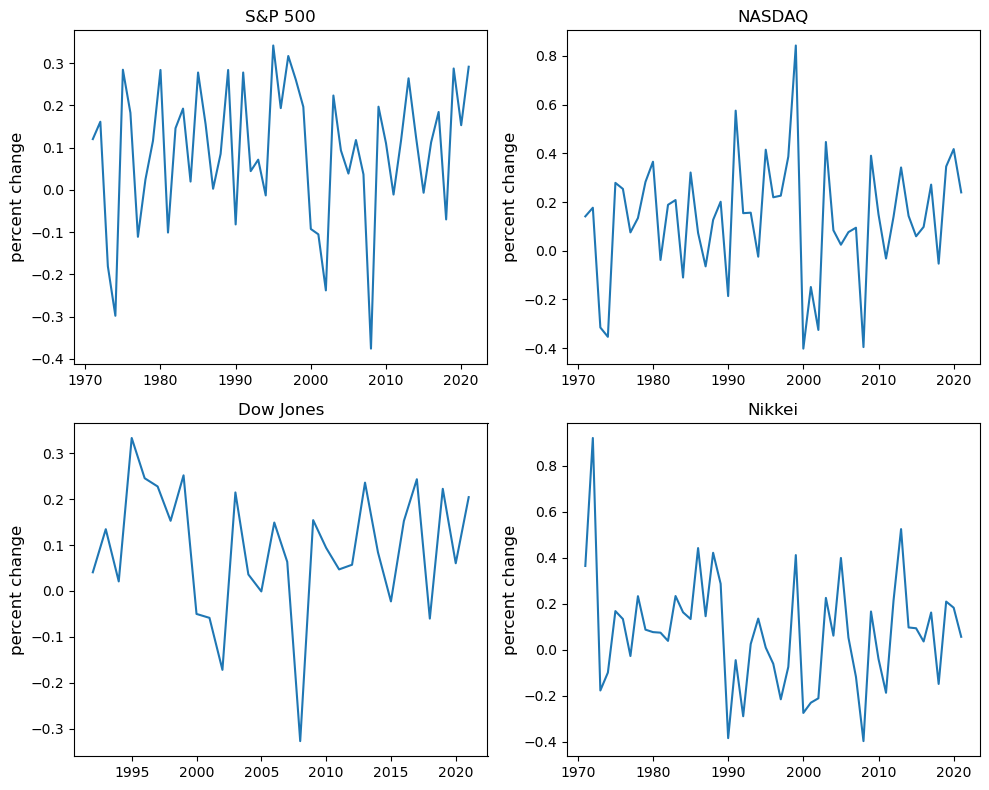

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for iter_, ax in enumerate(axes.flatten()):            # Flatten 2-D array to 1-D array
    index_name = yearly_returns.columns[iter_]         # Get index name per iteration
    ax.plot(yearly_returns[index_name])                # Plot pct change of yearly returns per index
    ax.set_ylabel("percent change", fontsize = 12)
    ax.set_title(index_name)

plt.tight_layout()

```{solution-end}
```

[^mung]: Wikipedia defines munging as cleaning data from one raw form into a structured, purged one.